### Load cleaned data and pre-defined classes

In [124]:
from data_clean import Data_to_Clean,Data_to_Analyze
import pickle
import os
import pandas as pd
import copy
import json
import logging
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()

MBTI_types=[
    'istj', 'isfj', 'infj', 'intj', 
    'istp', 'isfp', 'infp', 'intp', 
    'estp', 'esfp', 'enfp', 'entp', 
    'estj', 'esfj', 'enfj', 'entj'
    ]
cleaned_data={T:None for T in MBTI_types}

for type in cleaned_data.keys():
    file_path=f"Data\\cleaned_data\\p1\\{type}_cleaned.pkl" 
    try:
        with open(file_path, 'rb') as f:
            cleaned_data[type] = pickle.load(f)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except pickle.UnpicklingError:
        print(f"Error: Could not unpickle the file {file_path}. It might be corrupted or not a valid pickle file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [125]:
infp=cleaned_data["infp"]
infp.data.loc[0,"posts"]

['  Thanks Forest!',
 '  Thank you.',
 '  Thanks!',
 '  Thank you Elizabeth!',
 '  Thank you Holly.',
 '  Thank you!😊',
 '  No fuss.  Flew by the seat of our pants.',
 '  Thank you!',
 '  Thanks!',
 'Here we are...best friends with my sis and his son.  Great day!  ',
 '  Thank you!',
 '  Definitely! Thanks!',
 '  Thank you!',
 '  Thanks!',
 '  Thank you!',
 '  Thank you!',
 '  Yes! Thank you!',
 '  Thank you!',
 '  Thank you!',
 '  Thank you!',
 '  Thank you!',
 'Getting  married tomorrow!  Working on  decorations and flowers today.  Too old to make a big deal out of the day.…  ',
 '  Short list for a couple huge changes.  May you find it easy.',
 '  And yet all the threads go back before they come to the present...I  guess I am mostly done with b…  ',
 "  Incidentally,  the word commonly used for he'll is Gahenna in Ancient Greek--it is the trash dump b…  ",
 '  Why were you there and why did you get set free?!',
 '  Yes, right in Albuquerque, my hometown.  Not during the Fiesta thoug

### Visualize VADER score of all MBTI types

In [126]:
mbti_identities={
    T.upper():{
        k:cleaned_data[T].basic_identities[k]
        for k in [
        "ave_sentence_quantity",
        "ave_word_count",
        "ave_upper_ratio",
        "ave_reading_ease",
        "ave_GF_index"
        ]
    }
    for T in MBTI_types
}
mbti_identities=pd.DataFrame(mbti_identities).T
mbti_identities

ave_sentence_quantity  ave_word_count  ave_upper_ratio  \
ISTJ             140.922780     1584.861004         0.125113   
ISFJ             139.890110     1542.766484         0.139261   
INFJ             136.120151     1662.837275         0.108945   
INTJ             142.160051     1768.897567         0.111903   
ISTP             142.599388     1439.327217         0.135959   
ISFP             138.239782     1468.850136         0.147333   
INFP             135.311232     1538.657566         0.133015   
INTP             138.747226     1557.081381         0.124319   
ESTP             138.510000     1528.890000         0.144286   
ESFP             147.137931     1500.454023         0.157108   
ENFP             141.171468     1655.497942         0.136338   
ENTP             147.183709     1617.429809         0.125773   
ESTJ             150.148148     1861.827160         0.099657   
ESFJ             139.666667     1571.104762         0.141718   
ENFJ             141.915058     1690.857143         0.119560   
ENTJ             142.960573     1713.476703         0.116676   

      ave_reading_ease  ave_GF_index  
ISTJ         53.508301     16.561120  
ISFJ         58.487995     14.762555  
INFJ         59.505421     14.098761  
INTJ         55.228515     15.652458  
ISTP         50.868624     18.008930  
ISFP         51.682698     17.722262  
INFP         54.009626     16.649938  
INTP         50.273724     18.050296  
ESTP         54.100900     16.754100  
ESFP         54.208218     16.571782  
ENFP         55.011289     16.238724  
ENTP         48.465754     18.679307  
ESTJ         55.780123     15.963333  
ESFJ         58.292857     15.020381  
ENFJ         56.535425     15.473456  
ENTJ         55.087849     15.837384

C:\Users\DominicMin\AppData\Local\Temp\ipykernel_52332\2042108391.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


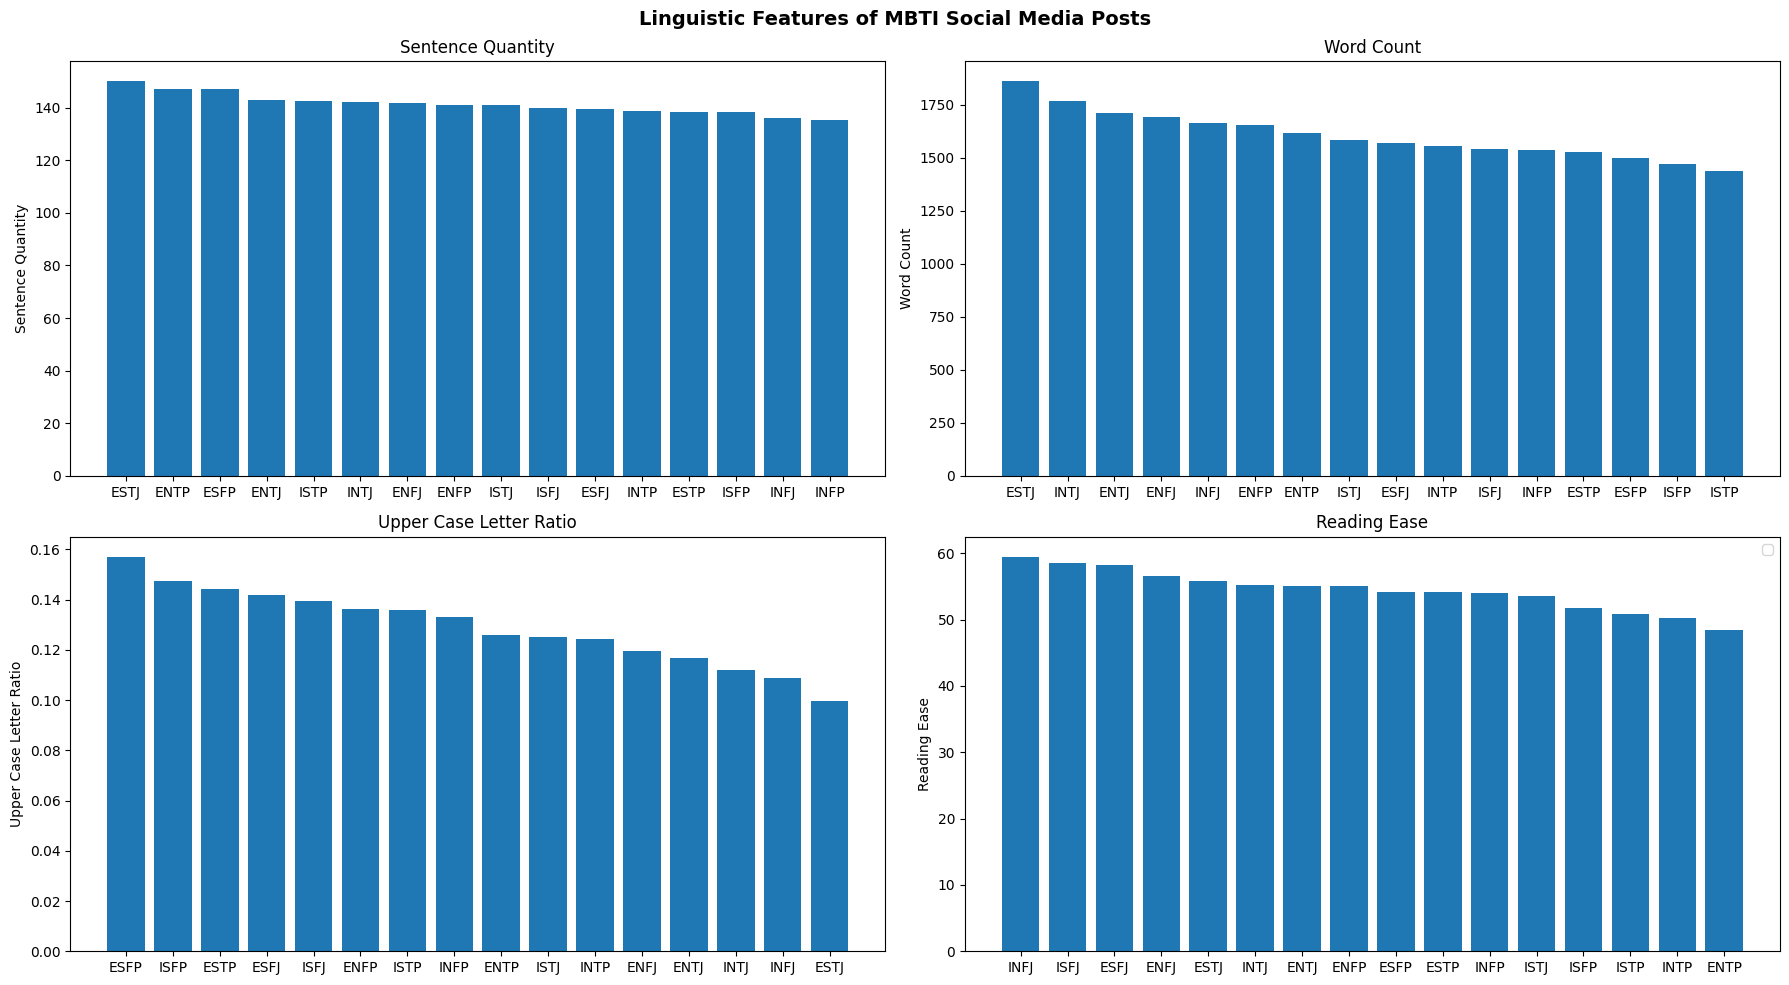

In [127]:
column_mapping={
    "ave_sentence_quantity":"Sentence Quantity",
    "ave_word_count":"Word Count",
    "ave_upper_ratio":"Upper Case Letter Ratio",
    "ave_reading_ease":"Reading Ease"
}
fig,axes=plt.subplots(2,2,figsize=(18,10))
axes=axes.flatten()
for i,col in enumerate(mbti_identities.columns[:4]):
    axes[i].bar(mbti_identities[col].sort_values(ascending=False).index, mbti_identities[col].sort_values(ascending=False))
    axes[i].set_ylabel(f"{column_mapping[col]}")
    axes[i].set_title(f"{column_mapping[col]}")
fig.suptitle("Linguistic Features of MBTI Social Media Posts",fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig("final_output/ling_features.png")
plt.show()

In [128]:
all_vader_scores={T:cleaned_data[T].basic_identities["overall_vader_score"] for T in MBTI_types}

In [129]:
all_vader_scores=pd.DataFrame(all_vader_scores).T

In [130]:
all_vader_scores=all_vader_scores.sort_values(by="compound",ascending=False)
all_vader_scores

neg       neu       pos  compound
isfj  0.074714  0.706432  0.179305  0.156459
infj  0.077386  0.706724  0.171925  0.146350
enfj  0.077268  0.706996  0.172352  0.146079
estj  0.075952  0.715335  0.168221  0.135310
esfj  0.079053  0.708754  0.163387  0.126369
enfp  0.081753  0.717179  0.163048  0.125133
intj  0.078297  0.723588  0.157496  0.117230
infp  0.086349  0.708721  0.163746  0.113087
isfp  0.086260  0.709435  0.164908  0.108508
entj  0.082541  0.718532  0.157704  0.106751
istj  0.083894  0.722811  0.153920  0.099382
esfp  0.088280  0.716392  0.156600  0.093912
estp  0.086791  0.719593  0.150472  0.093669
intp  0.086243  0.720133  0.151148  0.090751
istp  0.089930  0.711712  0.150577  0.078989
entp  0.087409  0.723706  0.144536  0.076574

In [131]:
all_vader_scores["compound"].describe()

count    16.000000
mean      0.113410
std       0.024352
min       0.076574
25%       0.093851
50%       0.110797
75%       0.128604
max       0.156459
Name: compound, dtype: float64

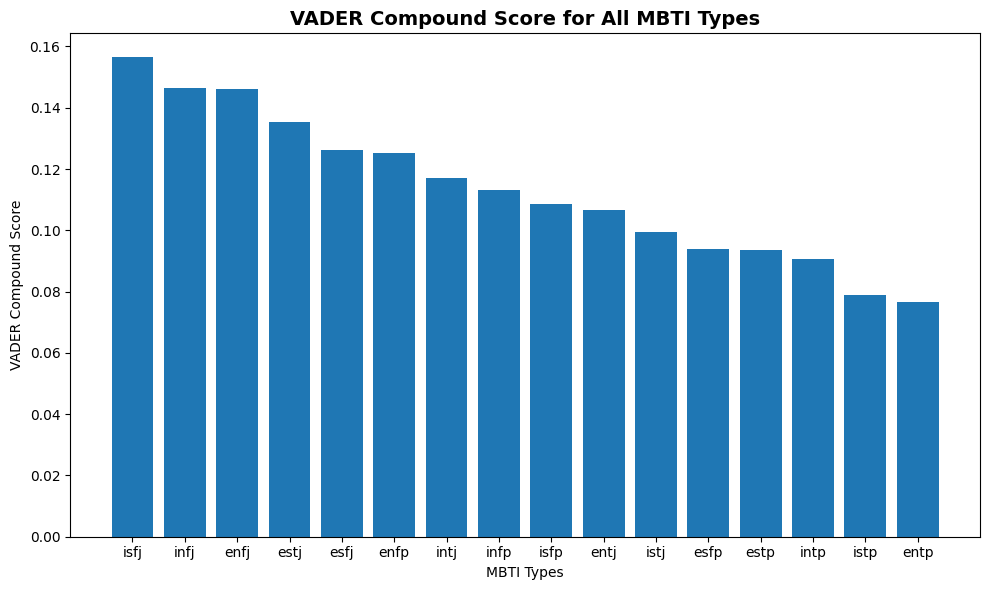

In [132]:
x=all_vader_scores.index
y=all_vader_scores["compound"]
plt.figure(figsize=(10, 6))
plt.bar(x,y)
plt.xlabel("MBTI Types")
plt.ylabel("VADER Compound Score")
plt.title("VADER Compound Score for All MBTI Types",fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("final_output/vader.png")
plt.show()

In [133]:
infp=cleaned_data["infp"]
infp_feature=pd.DataFrame({
    f:infp.basic_identities[f] for f in ["sentence_quantity","word_count","upper_ratio","reading_ease","GF_index","vader_compound"]
})
infp_feature["type"]="infp"


In [134]:
pd.DataFrame(infp_feature)

sentence_quantity  word_count  upper_ratio  reading_ease  GF_index  \
0                   158        2727     0.053427         86.40      6.06   
1                   113        1252     0.076183         80.58      4.14   
2                    69         805     0.031632          1.11     36.20   
3                   136         611     0.711374         59.77     13.53   
4                   154        2056     0.005436          6.11     37.41   
...                 ...         ...          ...           ...       ...   
1277                176        2996     0.046844         49.83     18.01   
1278                 99        1159     0.204991         70.16     12.34   
1279                 88        1370     0.070729         68.36      6.15   
1280                123        1583     0.060538         78.18      8.48   
1281                 57         518     0.052482         51.79     19.34   

      vader_compound  type  
0           0.321241  infp  
1           0.067999  infp  
2           0.008233  infp  
3           0.029300  infp  
4           0.005105  infp  
...              ...   ...  
1277        0.053619  infp  
1278        0.056859  infp  
1279        0.321209  infp  
1280        0.300885  infp  
1281        0.049498  infp  

[1282 rows x 7 columns]

In [135]:
mbti_feature={}
for t in MBTI_types:
    mbti_feature[t]=pd.DataFrame({
        f:cleaned_data[t].basic_identities[f] for f in ["sentence_quantity","word_count","upper_ratio","reading_ease","GF_index","vader_compound"]
    })
    mbti_feature[t]["type"]=t
full_feature=pd.concat(mbti_feature.values(),ignore_index=True)
full_feature

sentence_quantity  word_count  upper_ratio  reading_ease  GF_index  \
0                   134        1751     0.107340         63.29      8.90   
1                   116         896     0.360300         17.18     32.61   
2                   110         752     0.023983         74.15     12.93   
3                   195        2378     0.128397         61.50     12.77   
4                   120        1407     0.151231         12.88     32.62   
...                 ...         ...          ...           ...       ...   
7806                 23         540     0.079208         14.31     40.02   
7807                 63         627     0.065333          5.26     24.69   
7808                 94        1177     0.047270         73.68      7.80   
7809                102        1199     0.068160         54.09     16.30   
7810                126        1203     0.043478         48.91     17.96   

      vader_compound  type  
0           0.351572  istj  
1           0.205852  istj  
2           0.092233  istj  
3           0.160685  istj  
4           0.015757  istj  
...              ...   ...  
7806        0.180030  entj  
7807       -0.053895  entj  
7808        0.026555  entj  
7809        0.117386  entj  
7810        0.027199  entj  

[7811 rows x 7 columns]

In [150]:
def dimension_mapping(type):
    if type[1]=='n':
        return 1
    else:
        return -1
full_feature["N"]=full_feature["type"].apply(dimension_mapping)
full_feature

sentence_quantity  word_count  upper_ratio  reading_ease  GF_index  \
0                   134        1751     0.107340         63.29      8.90   
1                   116         896     0.360300         17.18     32.61   
2                   110         752     0.023983         74.15     12.93   
3                   195        2378     0.128397         61.50     12.77   
4                   120        1407     0.151231         12.88     32.62   
...                 ...         ...          ...           ...       ...   
7806                 23         540     0.079208         14.31     40.02   
7807                 63         627     0.065333          5.26     24.69   
7808                 94        1177     0.047270         73.68      7.80   
7809                102        1199     0.068160         54.09     16.30   
7810                126        1203     0.043478         48.91     17.96   

      vader_compound  type  I  N  F  P  
0           0.351572  istj  1 -1 -1 -1  
1           0.205852  istj  1 -1 -1 -1  
2           0.092233  istj  1 -1 -1 -1  
3           0.160685  istj  1 -1 -1 -1  
4           0.015757  istj  1 -1 -1 -1  
...              ...   ... .. .. .. ..  
7806        0.180030  entj -1  1 -1 -1  
7807       -0.053895  entj -1  1 -1 -1  
7808        0.026555  entj -1  1 -1 -1  
7809        0.117386  entj -1  1 -1 -1  
7810        0.027199  entj -1  1 -1 -1  

[7811 rows x 11 columns]

In [151]:
full_feature.to_csv("Data\\full_feature.csv",index=False)

In [152]:
import statsmodels.api as sm

In [156]:
X=sm.add_constant(full_feature[["I","N","F","P"]])
X
y=full_feature["vader_compound"]
results=sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         vader_compound   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     72.57
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           1.83e-60
Time:                        13:17:31   Log-Likelihood:                 5804.1
No. Observations:                7811   AIC:                        -1.160e+04
Df Residuals:                    7806   BIC:                        -1.156e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1131      0.002     67.607      0.000       0.110       0.116
I              0.0007      0.001      0.520      0.603      -0.002       0.003
N              0.0026      0.002      1.682      0.093      -0.000       0.006
F              0.0160      0.001     12.048      0.000       0.013       0.019
P             -0.0154      0.001    -11.720      0.000      -0.018      -0.013
==============================================================================
Omnibus:                     1260.766   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2722.857
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       5.176   Cond. No.                         2.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Construct a dictionary for LDA modeling

In [27]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel
def constract_initial_dict(source,no_above,no_below):

    output = {T: {
        "original_text": [],
    } for T in MBTI_types}
    
    output["all_original_text"]=[]
    for T in tqdm(MBTI_types):
        for i in source[T].data.index:
            temp=source[T].data.loc[i,"posts"]
            output[T]["original_text"].append(temp)
        output["all_original_text"].extend(output[T]["original_text"])
    output["overall_dict"]=corpora.Dictionary(output["all_original_text"])
    output["overall_dict"].filter_extremes(no_above=no_above,no_below=no_below)
    output["overall_dict"].compactify()
    print("Size of dictionary:",len(output["overall_dict"]))
    output["all_corpus"]=[output["overall_dict"].doc2bow(post_token) for post_token in output["all_original_text"]]
    return output
initial_dict=constract_initial_dict(source=cleaned_data,
                                    no_above=0.20,
                                    no_below=50)
with open("Data/initial_dict.pkl",'wb') as f:
    pickle.dump(initial_dict,f)


  0%|          | 0/16 [00:00<?, ?it/s]

Size of dictionary: 4595


In [28]:
def check_corpus(corpus,dict,name=''):
    result=pd.DataFrame(
        [
            list(range(len(dict))),
            [0]*len(dict)
        ]
    ).T
    result.columns=["word","frequency"]
    for post in tqdm(corpus):
        for word_tuple in post:
            result.loc[word_tuple[0],"frequency"]+=word_tuple[1]
    for i in result.index:
        result.loc[i,"word"]=dict[i]
    result=result.sort_values(by="frequency",ascending=False)
    result.to_csv(f"Data/{name}id2word_result.csv")

In [29]:
# check_corpus(initial_dict["all_corpus"],initial_dict["overall_dict"])

In [30]:
initial_dict["overall_dict"][266]

'afraid'

### Use LDA for topic modeling

In [31]:
with open("Data/initial_dict.pkl","rb") as f:
    initial_dict=pickle.load(f)
import gensim.corpora as corpora
import gensim
from gensim.models import LdaMulticore,CoherenceModel

def optimize_topic_num(
  start,
  end,
  step,
  dict=initial_dict["overall_dict"],
  corpus=initial_dict["all_corpus"],
  text=initial_dict["all_original_text"]      
):
  output=pd.Series({},dtype=float)
  topic_num_range=range(start, end+1, step)
  for topic_num in tqdm(topic_num_range, desc="计算全局模型主题数"):
  # 训练 LDA 模型 (在所有帖子数据上)
    temp_lda_model=LdaMulticore(
        corpus=corpus,    # 使用所有帖子的词袋语料
        id2word=dict,         # 使用全局词典
        num_topics=topic_num,
        random_state=100,
        chunksize=100,        # 减小chunksize以加快更新频率
        passes=10,            # 减少passes以缩短总训练时间
        iterations=50,        # 明确指定每次迭代的次数
        alpha=0.01,           # 使用较低的固定值促进主题稀疏性
        eta=0.01,             # 使用较低的固定值促进词汇稀疏性
        per_word_topics=False,  
        workers=None                    
    )

    # Evaluate the model 
    temp_chmodel=CoherenceModel(
        model=temp_lda_model,
        texts=text,
        dictionary=dict,
        coherence="c_v"
    )
    output[topic_num]=temp_chmodel.get_coherence()
  print(output)
    

In [32]:
# 在较大范围内寻找最佳主题数
optimize_topic_num(19,24,1)

计算全局模型主题数:   0%|          | 0/6 [00:00<?, ?it/s]

19    0.524685
20    0.488212
21    0.467017
22    0.472131
23    0.482915
24    0.470117
dtype: float64


In [36]:
optimize_topic_num(17,18,1)

计算全局模型主题数:   0%|          | 0/2 [00:00<?, ?it/s]

2025-06-10 17:24:34,799 - INFO - using serial LDA version on this node
2025-06-10 17:24:34,804 - INFO - running online LDA training, 17 topics, 10 passes over the supplied corpus of 7811 documents, updating every 2100 documents, evaluating every ~7811 documents, iterating 50x with a convergence threshold of 0.001000
2025-06-10 17:24:34,805 - INFO - training LDA model using 21 processes
2025-06-10 17:25:05,211 - INFO - PROGRESS: pass 0, dispatched chunk #0 = documents up to #100/7811, outstanding queue size 1
2025-06-10 17:25:05,214 - INFO - PROGRESS: pass 0, dispatched chunk #1 = documents up to #200/7811, outstanding queue size 2
2025-06-10 17:25:05,215 - INFO - PROGRESS: pass 0, dispatched chunk #2 = documents up to #300/7811, outstanding queue size 3
2025-06-10 17:25:05,217 - INFO - PROGRESS: pass 0, dispatched chunk #3 = documents up to #400/7811, outstanding queue size 4
2025-06-10 17:25:05,218 - INFO - PROGRESS: pass 0, dispatched chunk #4 = documents up to #500/7811, outstanding

17    0.501639
18    0.497024
dtype: float64


In [33]:
# Train the optimized final model with enhanced parameters for better convergence and topic separation
topics=19

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
# Optimized parameters for better convergence and topic distinction
lda_model = LdaMulticore(
    corpus=initial_dict["all_corpus"],
    id2word=initial_dict["overall_dict"],
    num_topics=topics,
    random_state=100,
    chunksize=100,           # 大幅减小：提高更新频率，改善收敛性
    passes=300,              # 适当减少：配合其他优化参数
    iterations=150,          # 新增：增加每个pass的迭代次数
    alpha=0.01,              # 从asymmetric改为小值：促进文档-主题稀疏性，提高主题区分度
    eta=0.01,                # 从auto改为小值：促进词汇-主题稀疏性，减少主题混杂
    decay=0.5,               # 新增：控制学习率衰减，改善收敛稳定性
    offset=1.0,              # 新增：学习率起始值         # 新增：每个chunk后更新模型
    minimum_probability=0.01, # 新增：过滤低概率主题分配
    per_word_topics=False,
    workers=None,               # 启用并行化加速训练
    eval_every=20            # 减少评估频率，降低计算开销
)

2025-06-10 17:19:45,644 - INFO - using serial LDA version on this node
2025-06-10 17:19:45,649 - INFO - running online LDA training, 19 topics, 300 passes over the supplied corpus of 7811 documents, updating every 2100 documents, evaluating every ~7811 documents, iterating 150x with a convergence threshold of 0.001000
2025-06-10 17:19:45,650 - INFO - training LDA model using 21 processes
2025-06-10 17:20:15,801 - INFO - PROGRESS: pass 0, dispatched chunk #0 = documents up to #100/7811, outstanding queue size 1
2025-06-10 17:20:15,803 - INFO - PROGRESS: pass 0, dispatched chunk #1 = documents up to #200/7811, outstanding queue size 2
2025-06-10 17:20:15,804 - INFO - PROGRESS: pass 0, dispatched chunk #2 = documents up to #300/7811, outstanding queue size 3
2025-06-10 17:20:15,806 - INFO - PROGRESS: pass 0, dispatched chunk #3 = documents up to #400/7811, outstanding queue size 4
2025-06-10 17:20:15,808 - INFO - PROGRESS: pass 0, dispatched chunk #4 = documents up to #500/7811, outstandi

In [34]:
# Model evaluation
chmodel = CoherenceModel(
        model=lda_model,
        texts=initial_dict["all_original_text"],
        dictionary=initial_dict["overall_dict"],
        coherence="c_v"
    )
cv=chmodel.get_coherence()
cv

2025-06-10 17:23:09,600 - INFO - using ParallelWordOccurrenceAccumulator<processes=21, batch_size=64> to estimate probabilities from sliding windows
2025-06-10 17:23:40,162 - INFO - 1 batches submitted to accumulate stats from 64 documents (14349 virtual)
2025-06-10 17:23:40,164 - INFO - 2 batches submitted to accumulate stats from 128 documents (27065 virtual)
2025-06-10 17:23:40,166 - INFO - 3 batches submitted to accumulate stats from 192 documents (37206 virtual)
2025-06-10 17:23:40,169 - INFO - 4 batches submitted to accumulate stats from 256 documents (51986 virtual)
2025-06-10 17:23:40,171 - INFO - 5 batches submitted to accumulate stats from 320 documents (65602 virtual)
2025-06-10 17:23:40,176 - INFO - 6 batches submitted to accumulate stats from 384 documents (78070 virtual)
2025-06-10 17:23:40,178 - INFO - 7 batches submitted to accumulate stats from 448 documents (88735 virtual)
2025-06-10 17:23:40,181 - INFO - 8 batches submitted to accumulate stats from 512 documents (999

0.5329203325298466

In [35]:
# Create unique directories for each LDA model
# That's because all variables are unique for each LDA model due to different stopword set
model_id=f"{topics}_{str(cv)[2:6]}"
# Model ID are designed as "[number of topics]_[CV score]", is unique for each model

path=f"output/lda_model/lda_{model_id}"
if not os.path.exists(path):
    os.makedirs(path)

path=f"output/lda_model/lda_{model_id}/cleaned_data"
if not os.path.exists(path):
    os.makedirs(path)

path=f"output/lda_model/lda_{model_id}/visualization"
if not os.path.exists(path):
    os.makedirs(path)

# Save LDA model
with open(f"output/lda_model/lda_{model_id}/lda_{model_id}.pkl",'wb') as f:
    pickle.dump(lda_model,f)

# Save cleaned data
with open(f"output/lda_model/lda_{model_id}/cleaned_data/cleaned_data.pkl", "wb") as f:
    pickle.dump(cleaned_data,f)

# Save original text
with open(f"output/lda_model/lda_{model_id}/all_original_text.pkl","wb") as f:
        pickle.dump(initial_dict["all_original_text"],f)
        
# Get all topics words and weights
all_topics_words = lda_model.show_topics(num_topics=-1, num_words=40, formatted=False)

markdown_content=f"## {topics} topics, cv={str(cv)[2:6]}\n\n"

for topic_id, topic_words_with_weights in all_topics_words:
        markdown_content += f"### Topic {topic_id}:\n" 
        
        
        for word, weight in topic_words_with_weights:
            markdown_content += f"- `{word}`: {weight:.4f}\n"
        markdown_content += "\n" 

# Save topic words and weights to markdown file
with open(f"output/lda_model/lda_{model_id}/lda_{model_id}.md", "w", encoding="utf-8") as f:
        f.write(markdown_content)